# Maximizing Revenue for Taxi Cab Drivers through Payment Type Analysis

# Problem Statement
The taxi business moves fast, and earning good money is important to keep drivers happy and the business running smoothly. The goal is to use data to help drivers earn more. Specifically, the project is checking if the way customers pay (like cash, card, or app payments) affects how much they are charged for the ride. It’s about understanding if payment methods make any difference in taxi fares.

# Objective
The project focuses on running an experiment (A/B test) to see if there’s a difference in the total taxi fares based on how people pay—credit card or cash. Using Python, we’ll do some smart calculations (hypothesis testing and analyzing stats) to find patterns. The goal is to figure out if one payment method leads to higher fares, which can help drivers earn better.
# Research Question
Is there a relationship between total fare amount and payment type and can we nudge customers towards payment methods that generate higher revenue for drivers, without negatively impacting customer experience?







Importing Libraries

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy import stats
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

Loading Data

In [2]:
data = pd.read_csv('/content/yellow_tripdata_2020-01 (1).csv')

Explortatory Data Analysis

In [3]:
data.shape

(283804, 18)

In [4]:
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2020-01-01 00:28:15,2020-01-01 00:33:03,1,1.2,1,N,238,239,1,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1,2020-01-01 00:35:39,2020-01-01 00:43:04,1,1.2,1,N,239,238,1,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1,2020-01-01 00:47:41,2020-01-01 00:53:52,1,0.6,1,N,238,238,1,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1,2020-01-01 00:55:23,2020-01-01 01:00:14,1,0.8,1,N,238,151,1,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2,2020-01-01 00:01:58,2020-01-01 00:04:16,1,0.0,1,N,193,193,2,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [5]:
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'],errors='coerce')
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'],errors='coerce')

data['duration'] = data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']


data['duration'] = data['duration'].dt.total_seconds()/60

In [6]:
data.dtypes

,0
VendorID,int64
tpep_pickup_datetime,datetime64[ns]
tpep_dropoff_datetime,datetime64[ns]
passenger_count,int64
trip_distance,float64
RatecodeID,int64
store_and_fwd_flag,object
PULocationID,int64
DOLocationID,int64
payment_type,int64


The dataset has a lot of information, but for this project, we only need a few important details. So, we'll remove the extra, unnecessary data. Since we're focusing on things like how the payment type, number of passengers, trip distance, and trip duration affect the fare, we'll keep just those key columns in the dataset.

In [7]:
data.drop(['VendorID','tpep_pickup_datetime','tpep_dropoff_datetime',
                'RatecodeID','store_and_fwd_flag','PULocationID','DOLocationID','extra',
                'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge'
                ,'total_amount','congestion_surcharge'],
               axis = 1, inplace = True)

In [11]:
data

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,1,6.0,4.800000
1,1,1.20,1,7.0,7.416667
2,1,0.60,1,6.0,6.183333
3,1,0.80,1,5.5,4.850000
4,1,0.00,2,3.5,2.300000
...,...,...,...,...,...
283799,1,1.54,2,11.0,14.916667
283800,1,4.50,4,19.0,24.083333
283801,1,0.95,1,7.0,9.016667
283802,1,0.70,2,5.0,4.400000


Data Cleaning

In [9]:
data.isnull().sum()

,0
passenger_count,0
trip_distance,0
payment_type,0
fare_amount,1
duration,0


In [12]:
data.dropna(inplace=True)

In [13]:
data

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,1,6.0,4.800000
1,1,1.20,1,7.0,7.416667
2,1,0.60,1,6.0,6.183333
3,1,0.80,1,5.5,4.850000
4,1,0.00,2,3.5,2.300000
...,...,...,...,...,...
283798,1,4.19,2,18.5,22.483333
283799,1,1.54,2,11.0,14.916667
283800,1,4.50,4,19.0,24.083333
283801,1,0.95,1,7.0,9.016667


In [16]:
data['passenger_count']=data['passenger_count'].astype('int64')
data['payment_type']=data['payment_type'].astype('int64')

In [17]:
data[data.duplicated()]

,passenger_count,trip_distance,payment_type,fare_amount,duration
2056,1,0.0,2,7.0,0.000000
2441,1,0.0,1,52.0,0.200000
2446,2,1.7,1,9.5,13.066667
2465,1,0.4,1,4.0,3.083333
3344,1,1.2,1,6.0,5.350000
...,...,...,...,...,...
283765,1,1.2,1,6.0,5.916667
283768,2,1.3,1,7.0,7.233333
283786,1,0.9,1,8.0,11.350000
283796,2,0.9,2,5.0,3.516667


In [18]:
data.drop_duplicates(inplace=True)

In [19]:
data.shape

(248536, 5)

In [20]:
data['passenger_count'].value_counts(normalize=True)

,proportion
passenger_count,
1,0.626271
2,0.191839
3,0.059545
5,0.042300
4,0.036200
6,0.026057
0,0.017760
8,0.000020
7,0.000004


In [21]:
data['payment_type'].value_counts(normalize=True)

,proportion
payment_type,
1,0.626304
2,0.362913
3,0.006651
4,0.004132


We’ll only focus on the two payment methods: ‘card’ (represented by 1) and ‘cash’ (represented by 2) in the data, ignoring all other payment types. Also, we’ve noticed that trips with more than 5 passengers are very rare, and there can never be trips with zero passengers since someone has to pay. So, we'll filter the data to include only trips with 1 to 5 passengers.

In [22]:

data = data[data['payment_type']<3]
data = data[(data['passenger_count']>0)&(data['passenger_count']<6)]

In [23]:
data['payment_type'].replace([1,2],['Card','Cash'], inplace = True)

In [24]:
data

,passenger_count,trip_distance,payment_type,fare_amount,duration
0,1,1.20,Card,6.0,4.800000
1,1,1.20,Card,7.0,7.416667
2,1,0.60,Card,6.0,6.183333
3,1,0.80,Card,5.5,4.850000
4,1,0.00,Cash,3.5,2.300000
...,...,...,...,...,...
283795,1,1.09,Cash,8.0,9.716667
283797,1,2.02,Card,10.0,11.266667
283798,1,4.19,Cash,18.5,22.483333
283799,1,1.54,Cash,11.0,14.916667


In [25]:
data.describe()

,passenger_count,trip_distance,fare_amount,duration
count,235113.000000,235113.000000,235113.000000,235113.000000
mean,1.617142,3.687571,14.690220,18.058028
std,1.059274,4.505464,13.869028,78.186609
min,1.000000,-0.880000,-110.000000,0.000000
25%,1.000000,1.140000,7.000000,6.750000
50%,1.000000,2.000000,10.000000,11.233333
75%,2.000000,4.020000,16.500000,17.916667
max,5.000000,100.150000,491.000000,1439.600000


After looking at the data, we noticed some values for trip distance, fare, and duration are negative, which doesn't make sense because a trip can't have negative numbers. So, we'll remove those. We also saw that there are some very high values (outliers) that could mess up the analysis. We’ll remove these extreme values to make sure our findings are accurate and reliable.

In [26]:
data = data[data['fare_amount']>0]
data = data[data['trip_distance']>0]
data = data[data['duration']>0]

In [27]:
data.describe()

,passenger_count,trip_distance,fare_amount,duration
count,232829.000000,232829.000000,232829.000000,232829.000000
mean,1.618097,3.720456,14.499871,18.084102
std,1.060191,4.509969,13.270312,78.138009
min,1.000000,0.010000,0.010000,0.016667
25%,1.000000,1.160000,7.000000,6.816667
50%,1.000000,2.020000,10.000000,11.283333
75%,2.000000,4.070000,16.500000,17.916667
max,5.000000,100.150000,400.000000,1439.600000


Now, its okay and lets check for outliers and remove them.

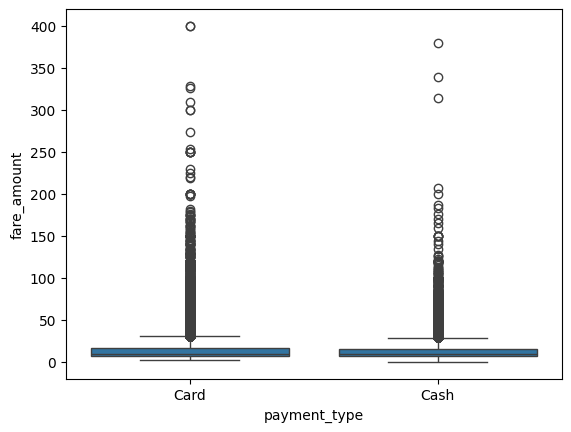

In [31]:
sns.boxplot(data=data, y="fare_amount", x="payment_type")
plt.show()

In [62]:
# removing outliers using interquartile range for the numerical variables
for col in ['trip_distance','fare_amount','duration']:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1


    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]


We want to understand how the way passengers pay (card or cash) relates to how far they travel and how much they pay. Are there any differences in the payment method based on the fare amount or trip distance?

To find this out, we’ll create histograms, which are charts that show the distribution of passengers paying with card or cash. This will help us and the stakeholders see the range of fare amounts for each payment method.

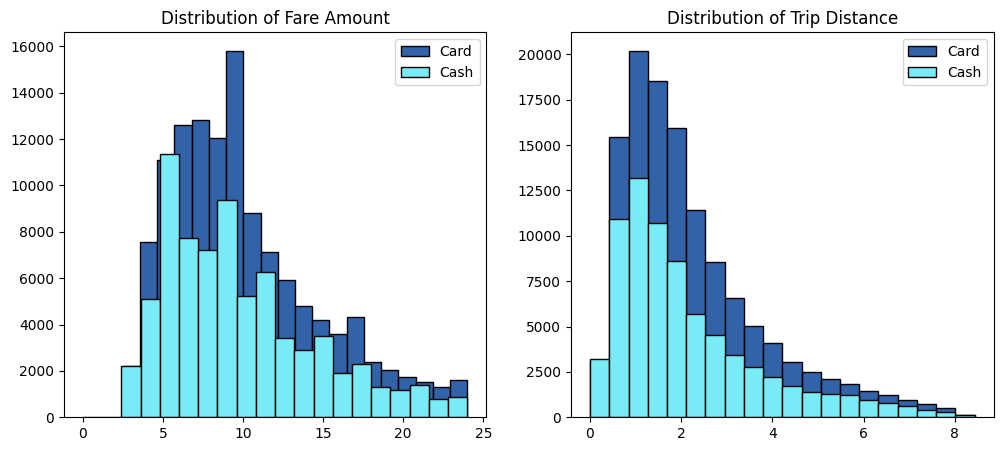

fare_amount           trip_distance          
                    mean       std          mean       std
payment_type                                              
Card           10.098028  4.654051      2.241067  1.558859
Cash            9.870209  4.722425      2.140995  1.602473

In [50]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title('Distribution of Fare Amount')
plt.hist(data[data['payment_type']=='Card']['fare_amount'], histtype='barstacked', bins = 20, edgecolor = 'k', color = '#3262a8', label = 'Card')
plt.hist(data[data['payment_type']=='Cash']['fare_amount'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#79ebf7',label = 'Cash')
plt.legend()

plt.subplot(1,2,2)
plt.title('Distribution of Trip Distance')
plt.hist(data[data['payment_type']=='Card']['trip_distance'], histtype='barstacked', bins = 20, edgecolor = 'k',color = '#3262a8',label = 'Card')
plt.hist(data[data['payment_type']=='Cash']['trip_distance'],  histtype='barstacked',bins = 20, edgecolor = 'k', color = '#79ebf7',label = 'Cash')
plt.legend()
plt.show()

# calculating the mean and standard deviation group by on payment type
data.groupby('payment_type').agg({'fare_amount': ['mean', 'std',], 'trip_distance': ['mean', 'std'],})

To understand how passengers prefer to pay, we'll look at the proportion of people using card versus cash. To make this easier to understand, we'll use a pie chart, which will show the share of each payment method in a clear and simple way. This will help visualize how many passengers choose each option.

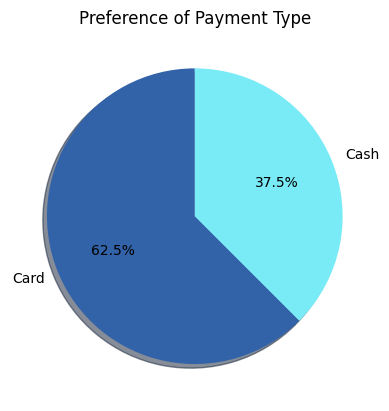

In [51]:
plt.title('Preference of Payment Type')
plt.pie(data['payment_type'].value_counts(normalize = True), labels = data['payment_type'].value_counts().index,
       startangle = 90,shadow = True, autopct = '%1.1f%%', colors = ['#3262a8','#79ebf7'])
plt.show()

# Hypothesis Testing

To choose the right test for our analysis, we first need to check if the fare amounts follow a normal distribution (a common pattern). While the histogram we created earlier suggests they might not, we’ll double-check by using a QQ plot. This plot compares the data to a straight line—if the points line up close to the line, it means the data follows a normal distribution.

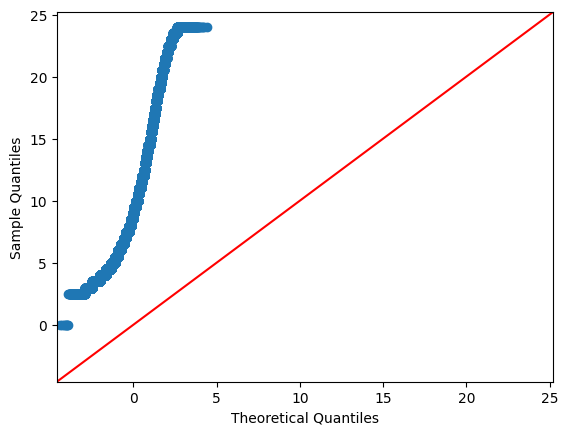

In [56]:

fig = sm.qqplot(data['fare_amount'], line='45')
plt.show()

The QQ plot shows that the fare amounts don’t follow a normal pattern, so using a Z-test wouldn’t be the right choice. Instead, we’ll use a T-test. The T-test works well for both small and large sample sizes, and it doesn't need us to know the overall population’s standard deviation, which is often unknown in real-world cases. For our taxi trip data, the T-test is a better method because it helps us compare the average fare amounts for card and cash payments, even when we don’t know everything about the larger population. It's a reliable way to draw conclusions from the data we have.


**Null hypothesis:** There is no difference in average fare between customers who use credit cards and customers who use cash.

**Alternative hypothesis:** There is a difference in average fare between customers who use credit cards and customers who use cash

In [61]:
# sample 1
card = data[data['payment_type'] == 'Card']['fare_amount']

# sample 2
cash = data[data['payment_type'] == 'Cash']['fare_amount']

# performing t test on both the different sample
t_stat, p_value = stats.ttest_ind(a=card, b=cash, equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# comparing the p value with the significance of 5% or 0.05
if p_value < 0.05:
    print("\nReject the null hypothesis")
else:
    print("\nAccept the null hypothesis")

T-statistic: 10.437500753115929, P-value: 1.7046000311319704e-25

Reject the null hypothesis


The p-value we got is much smaller than the 5% threshold, which means the results are strong enough for us to reject the idea that there's no difference (the null hypothesis). So, we can confidently say that there’s a real difference in the average fare amount between people who pay with credit cards and those who pay with cash.

**The big takeaway for taxi drivers is that getting passengers to pay with  cards can help them earn more money.**